# CAB420 Assignment 1A Question 3: Template and Utilities Demo

## Overview

## Utility Functions

The following cell contains utility functions to:
* Load the data
* Vectorise the data
* Plot images
* Resize all images
* Convert images to grayscale

These are provided to assist you in developing your solution.

In [1]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize
from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorboard import notebook

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# function to compute class weights

from sklearn.utils import compute_class_weight

import scipy.io
import seaborn as sns


# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, test_path):

    # load files
    train = loadmat(train_path)
    test = loadmat(test_path)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    train_X = np.transpose(train['train_X'], (3, 0, 1, 2)) / 255.0
    train_Y = train['train_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    train_Y[train_Y == 10] = 0
    # train_Y = np.reshape(train_Y, -1)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    test_X = np.transpose(test['test_X'], (3, 0, 1, 2)) / 255.0
    test_Y = test['test_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    test_Y[test_Y == 10] = 0
    # test_Y = np.reshape(test_Y, -1)

    # return loaded data
    return train_X, train_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)

## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.

(1000, 32, 32, 3)
(1000, 1)
(10000, 32, 32, 3)
(10000, 1)


C:\Users\ryani\miniconda3\envs\cab420\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


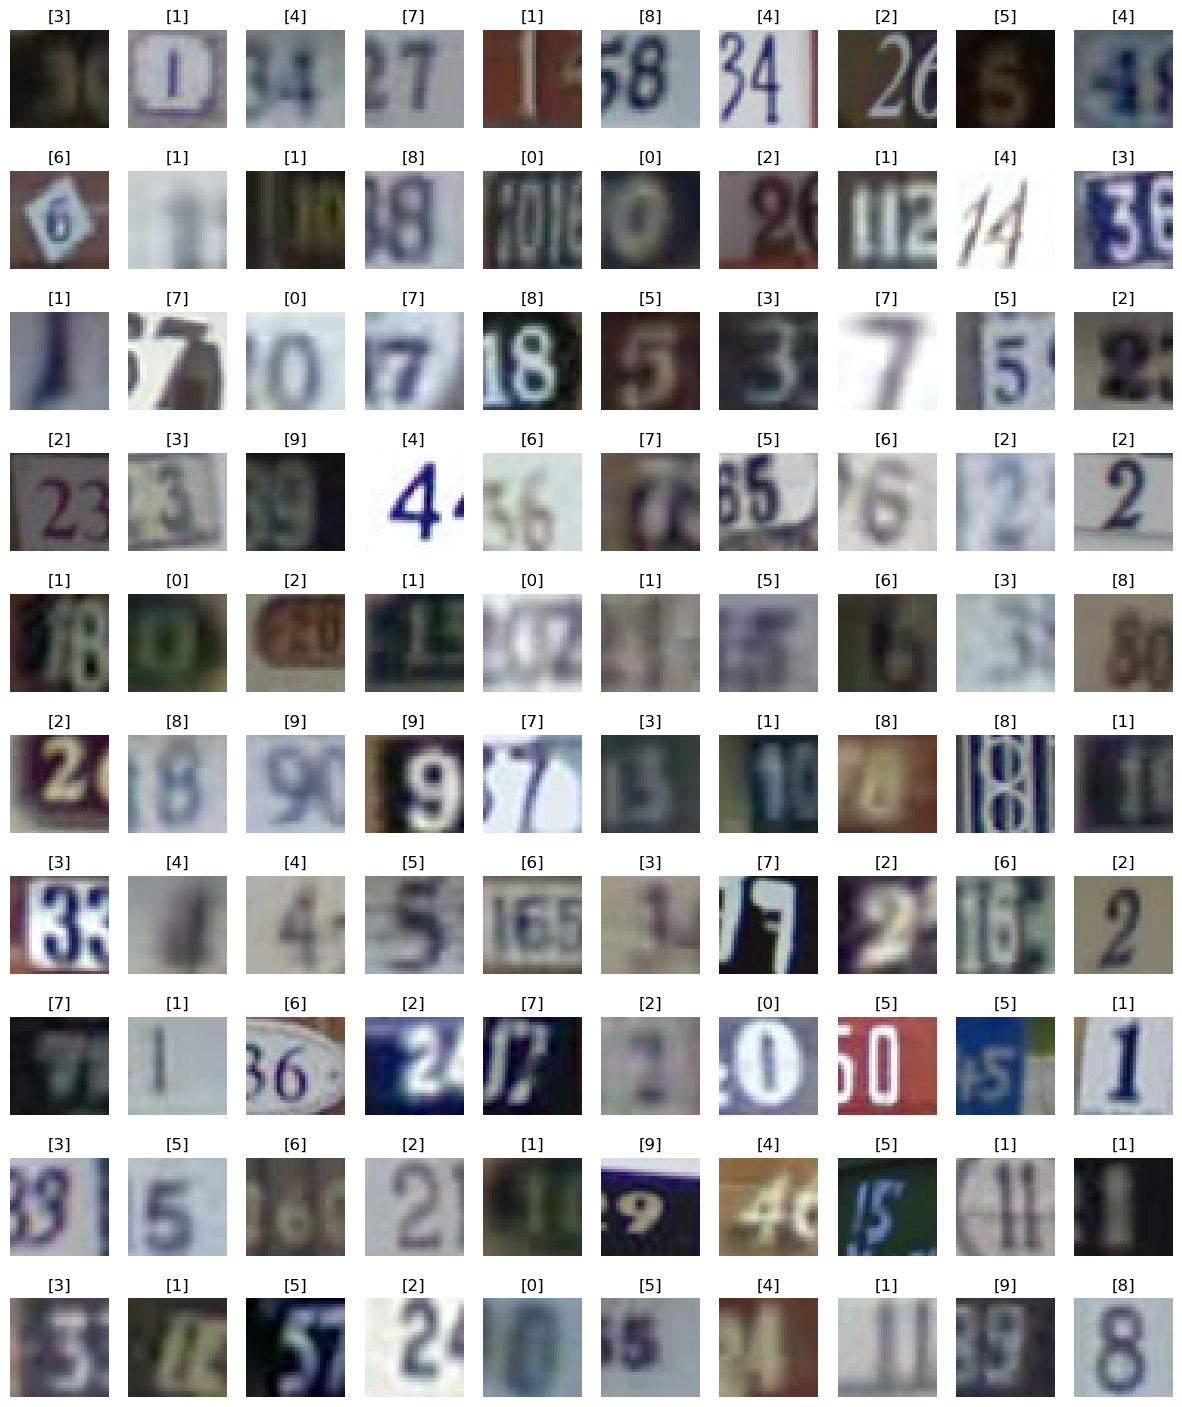

In [2]:
train_X, train_Y, test_X, test_Y = load_data('Q3/q3_train.mat', 'Q3/q3_test.mat')

# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.

In [3]:
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:
* Resize images
* Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.

(1000, 20, 20, 1)


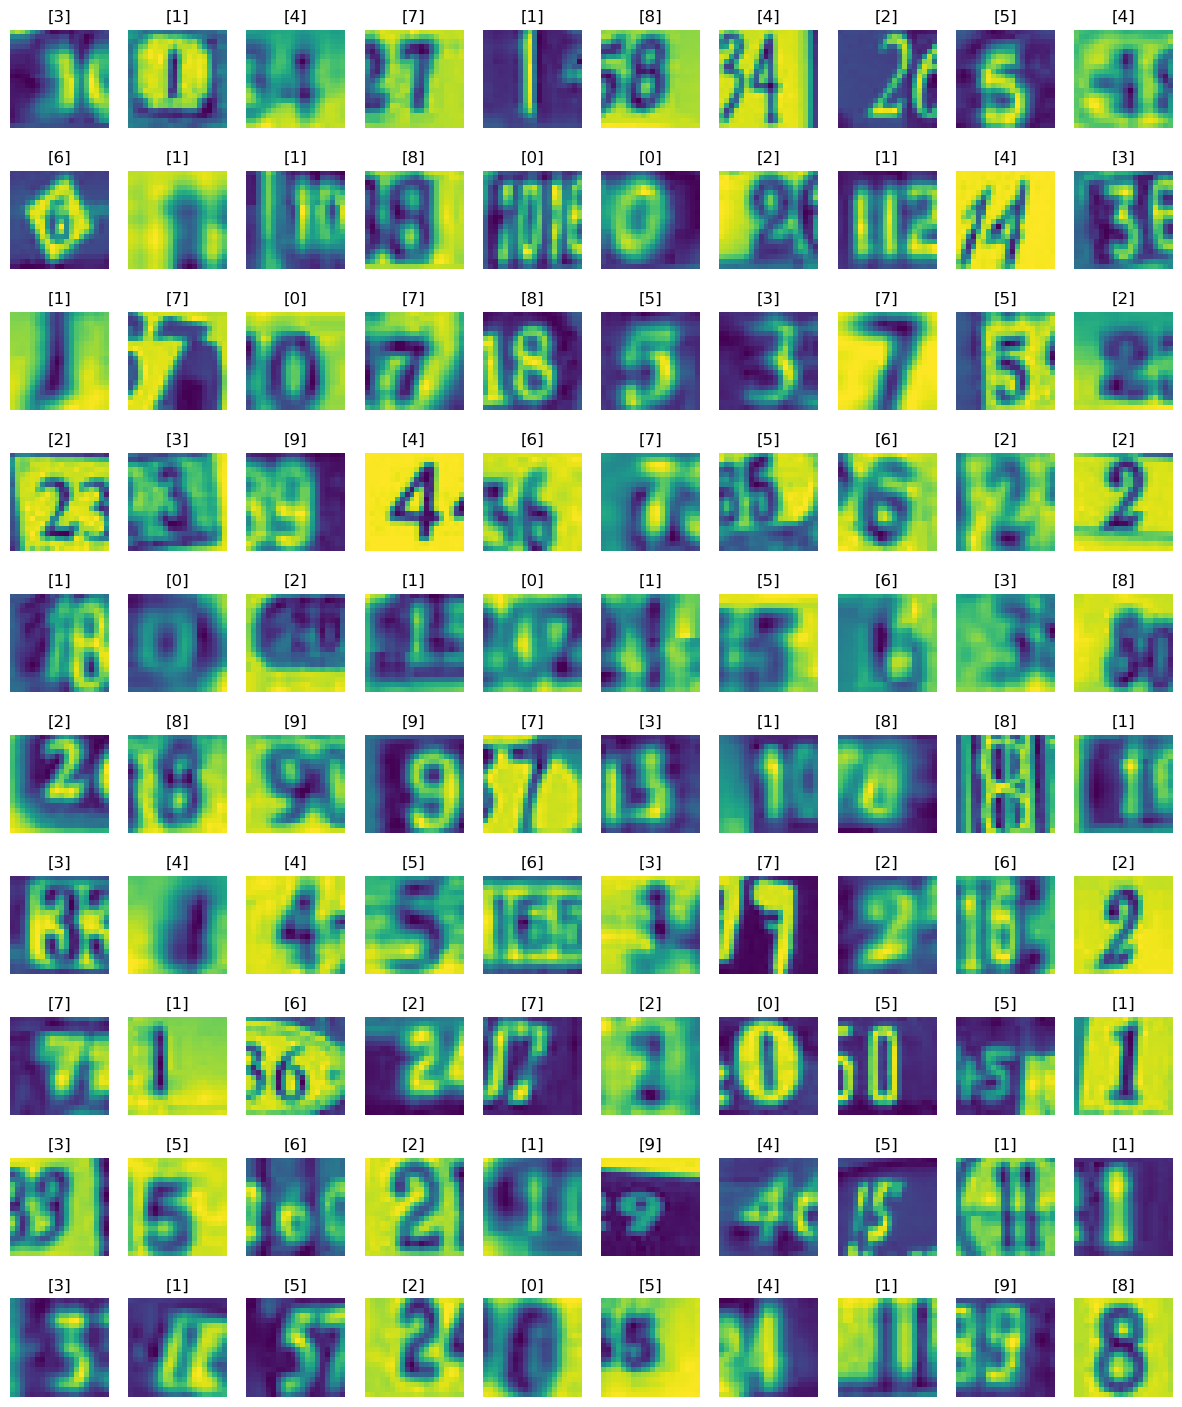

In [4]:
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use ``process_time`` within the ``time`` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:

In [5]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y, test_X, test_Y = load_data('Q3/q3_train.mat', 'Q3/q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.000000 seconds
Time to resize data: 0.015625 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.

Training Time: 0.625000
Inference Time (training set): 0.343750
Inference Time (testing set): 3.578125
(1000,)
(1000, 2500)
              precision    recall  f1-score   support

           0       0.25      0.23      0.24       711
           1       0.33      0.51      0.40      1894
           2       0.33      0.37      0.35      1497
           3       0.31      0.25      0.28      1141
           4       0.28      0.27      0.27      1035
           5       0.33      0.29      0.31       892
           6       0.28      0.17      0.21       758
           7       0.31      0.21      0.25       789
           8       0.30      0.26      0.28       683
           9       0.41      0.25      0.31       600

    accuracy                           0.31     10000
   macro avg       0.31      0.28      0.29     10000
weighted avg       0.31      0.31      0.31     10000



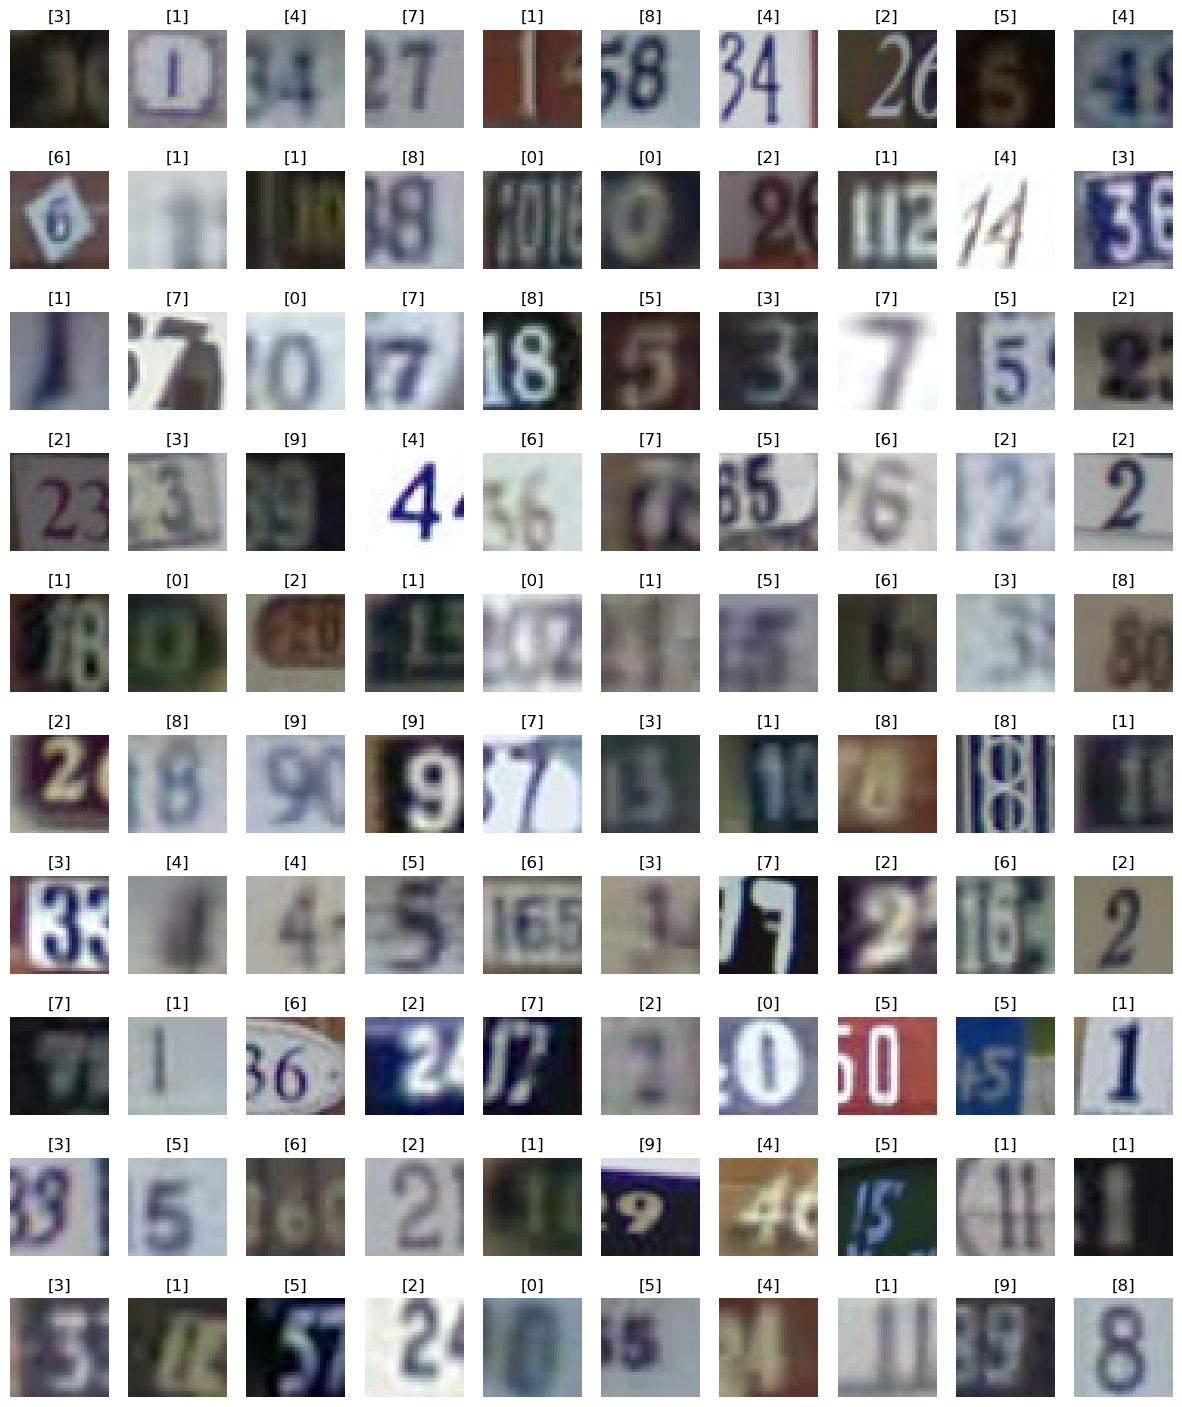

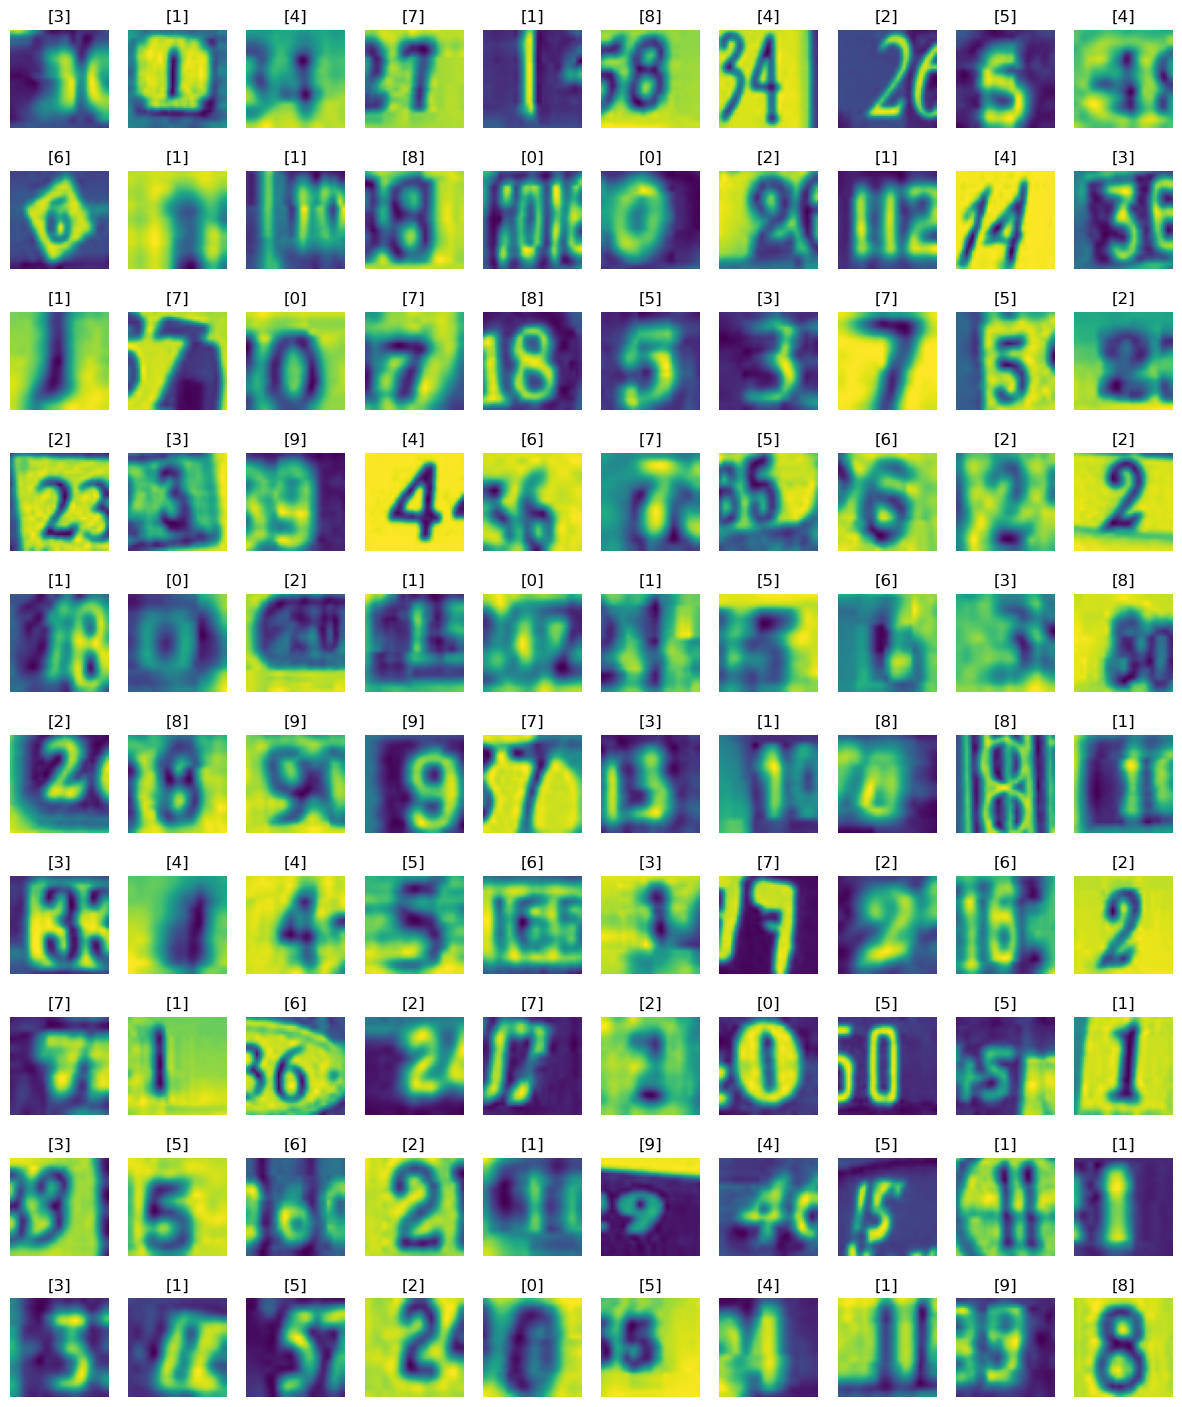

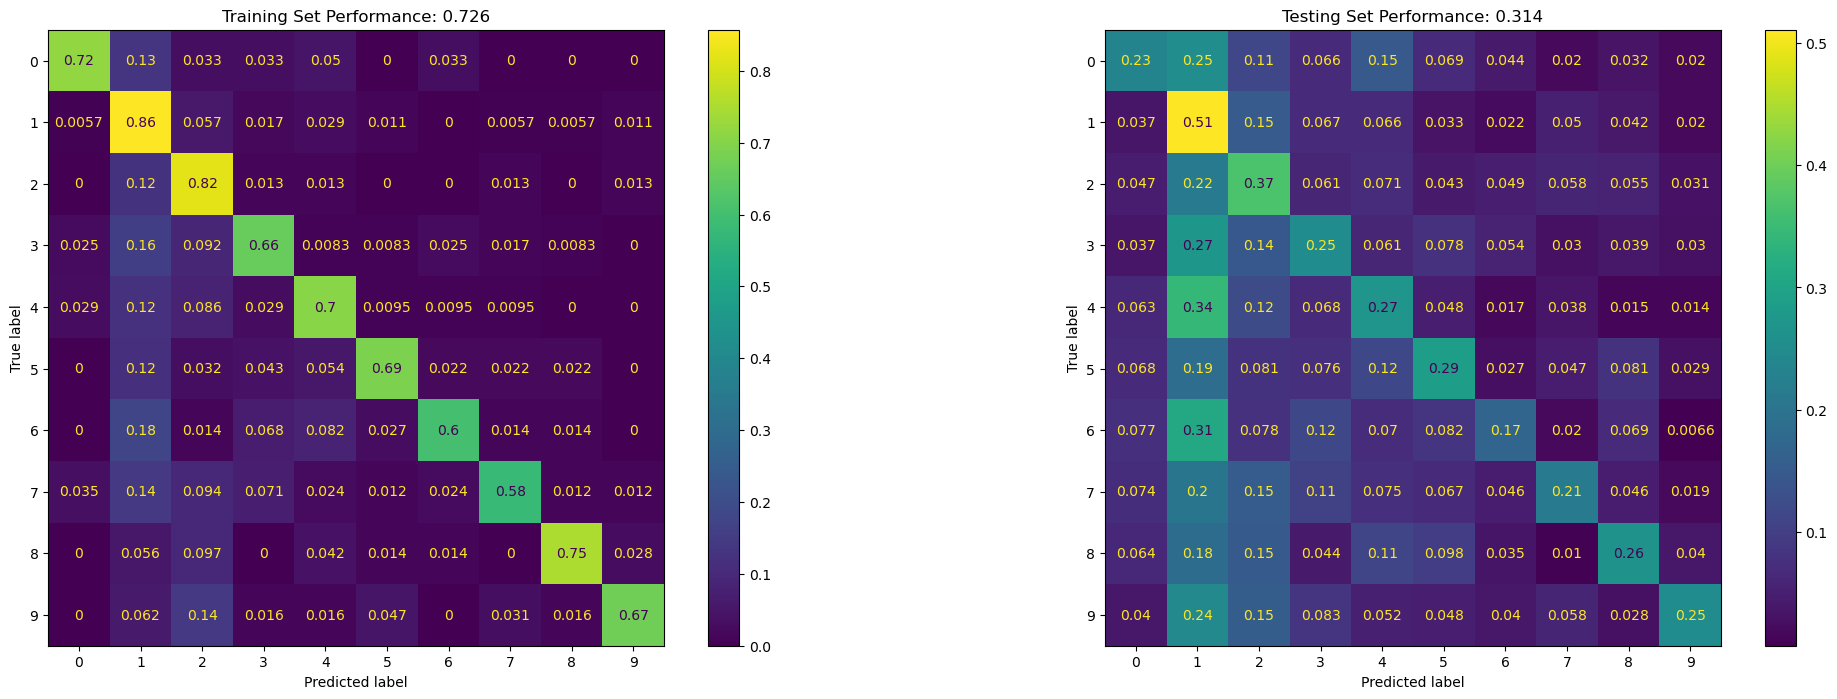

In [6]:
from sklearn.svm import SVC
from time import process_time

# load data
train_X, train_Y, test_X, test_Y = load_data('Q3/q3_train.mat', 'Q3/q3_test.mat')

# visualise images as a sanity check
plot_images(train_X, train_Y)

test_Y_keras = np.reshape(test_Y, -1)
train_Y_keras = np.reshape(train_Y, -1)

# any resize, colour change, etc, would go here

train_X_large_gs = convert_to_grayscale(resize(train_X, (50, 50)))
test_X_large_gs = convert_to_grayscale(resize(test_X, (50, 50)))
plot_images(train_X_large_gs, train_Y)

# vectorise data
# If you do any resize, reshape, etc of the data prior to putting this into your DCNN, change this code to 
# vectorise that verison of the data. The same data should be used by all models for a fair comparison; though
# you will only vectorise the data for the SVM (i.e. the DCNN will get the data as images).
train_vector_X = vectorise(train_X_large_gs)
test_vector_X = vectorise(test_X_large_gs)

# train the SVM
svm_train_start = process_time()
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y_keras)
svm_train_end = process_time()
train_predictions = svm.predict(train_vector_X)
svm_train_pred_end = process_time()
test_predictions = svm.predict(test_vector_X)
svm_test_pred_end = process_time()

svm_train_time = svm_train_end - svm_train_start
svm_inference_train_time = svm_train_pred_end - svm_train_end
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end
print('Training Time: %f\nInference Time (training set): %f\nInference Time (testing set): %f' % \
      (svm_train_time, svm_inference_train_time, svm_inference_test_time))

### evaluate SVM

print(train_Y_keras.shape)
print(train_vector_X.shape)

def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test)))

eval_model(svm, train_vector_X, train_Y_keras, test_vector_X, test_Y_keras)

In [7]:
# develop, evaluate and compare DCNNs
vgg_train_start = process_time()
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# 3x3 conv block, we have two conv layers, and a max-pooling. The conv layers have identical parameters
# and are simply separated by an activation, in our case, relu
x = layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation=None)(inputs)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, increase filters, same structure as above, but now with 16 filters
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, further increase filters to 32, again the structure is the same
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# flatten layer
x = layers.Flatten()(x)

# dense layer, 512 neurons
x = layers.Dense(512, activation='relu')(x)

# the output, 10 neurons for 10 classes, and a softmax activation
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
model_vgg = keras.Model(inputs=inputs, outputs=outputs, name='vgg_for_svhn')
model_vgg.summary()

# Without augmentation
model_vgg.compile(
    # categorical cross entropy loss
    loss='categorical_crossentropy',
    # adam optimiser
    optimizer=keras.optimizers.Adam(),
    # compute the accuracy metric, in addition to the loss 
    metrics=['accuracy'])

vgg_train_end = process_time()

Model: "vgg_for_svhn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                      

In [8]:
# train the model
train_Y = to_categorical(train_Y, 10)
test_Y = to_categorical(test_Y, 10)
print(train_Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# we'll capture the returned history object that will tell us about the training performance
print(train_X.shape)
print(train_Y.shape)


svhn_train_start = process_time()

history = model_vgg.fit(train_X, train_Y,
                    batch_size=128,
                    epochs=32,
                    validation_data=(test_X, test_Y), verbose=True)

svhn_train_end = process_time()

(1000, 32, 32, 3)
(1000, 10)
Epoch 1/32
8/8 [==============================] - 3s 277ms/step - loss: 2.2835 - accuracy: 0.1560 - val_loss: 2.2396 - val_accuracy: 0.1894
Epoch 2/32
8/8 [==============================] - 2s 239ms/step - loss: 2.2587 - accuracy: 0.1750 - val_loss: 2.2533 - val_accuracy: 0.1894
Epoch 3/32
8/8 [==============================] - 2s 244ms/step - loss: 2.2486 - accuracy: 0.1750 - val_loss: 2.2388 - val_accuracy: 0.1894
Epoch 4/32
8/8 [==============================] - 2s 240ms/step - loss: 2.2420 - accuracy: 0.1750 - val_loss: 2.2374 - val_accuracy: 0.1894
Epoch 5/32
8/8 [==============================] - 2s 241ms/step - loss: 2.2394 - accuracy: 0.1750 - val_loss: 2.2328 - val_accuracy: 0.1894
Epoch 6/32
8/8 [==============================] - 2s 250ms/step - loss: 2.2345 - accuracy: 0.1750 - val_loss: 2.2335 - val_accuracy: 0.1896
Epoch 7/32
8/8 [==============================] - 2s 257ms/step - loss: 2.2361 - accuracy: 0.1760 - val_loss: 2.2232 - val_accuracy

In [10]:
vgg_train_time = vgg_train_end - vgg_train_start
svhn_inference_train_time = svhn_train_end - svhn_train_start
print('Training Time: %f\nInference Time: %f' % \
      (vgg_train_time, svhn_inference_train_time))

Training Time: 0.093750
Inference Time: 33.593750


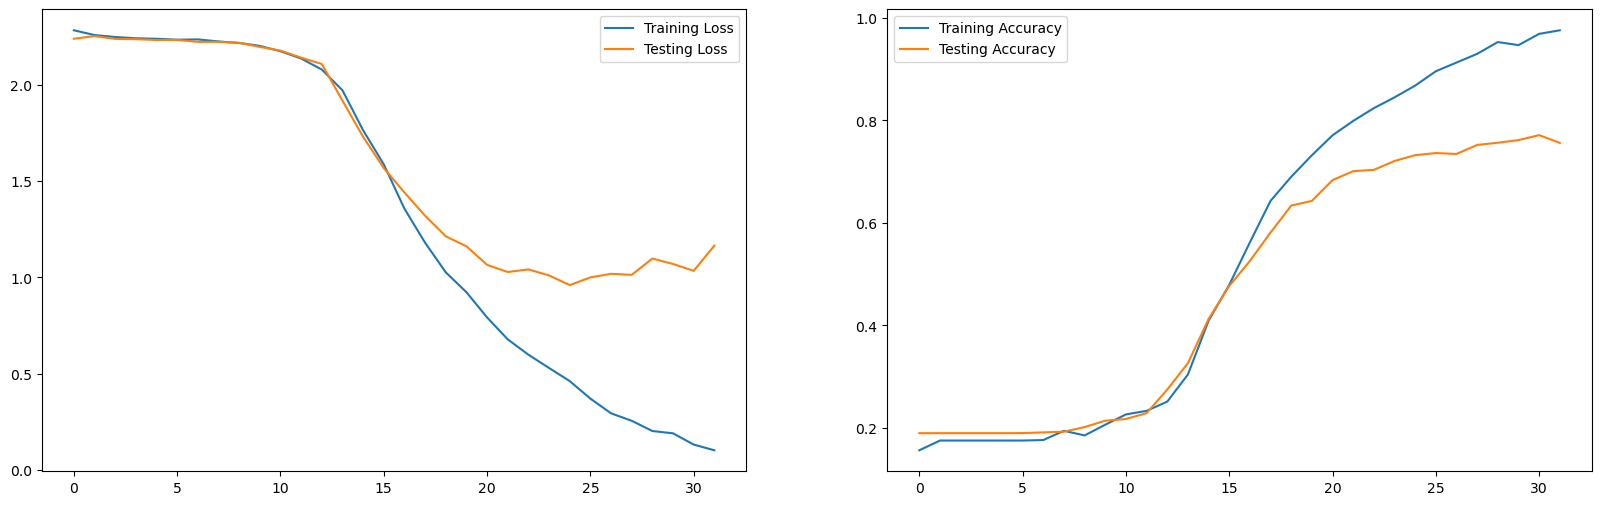

In [11]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label="Training Loss")
ax.plot(history.history['val_loss'], label="Testing Loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label="Training Accuracy")
ax.plot(history.history['val_accuracy'], label="Testing Accuracy")
ax.legend()

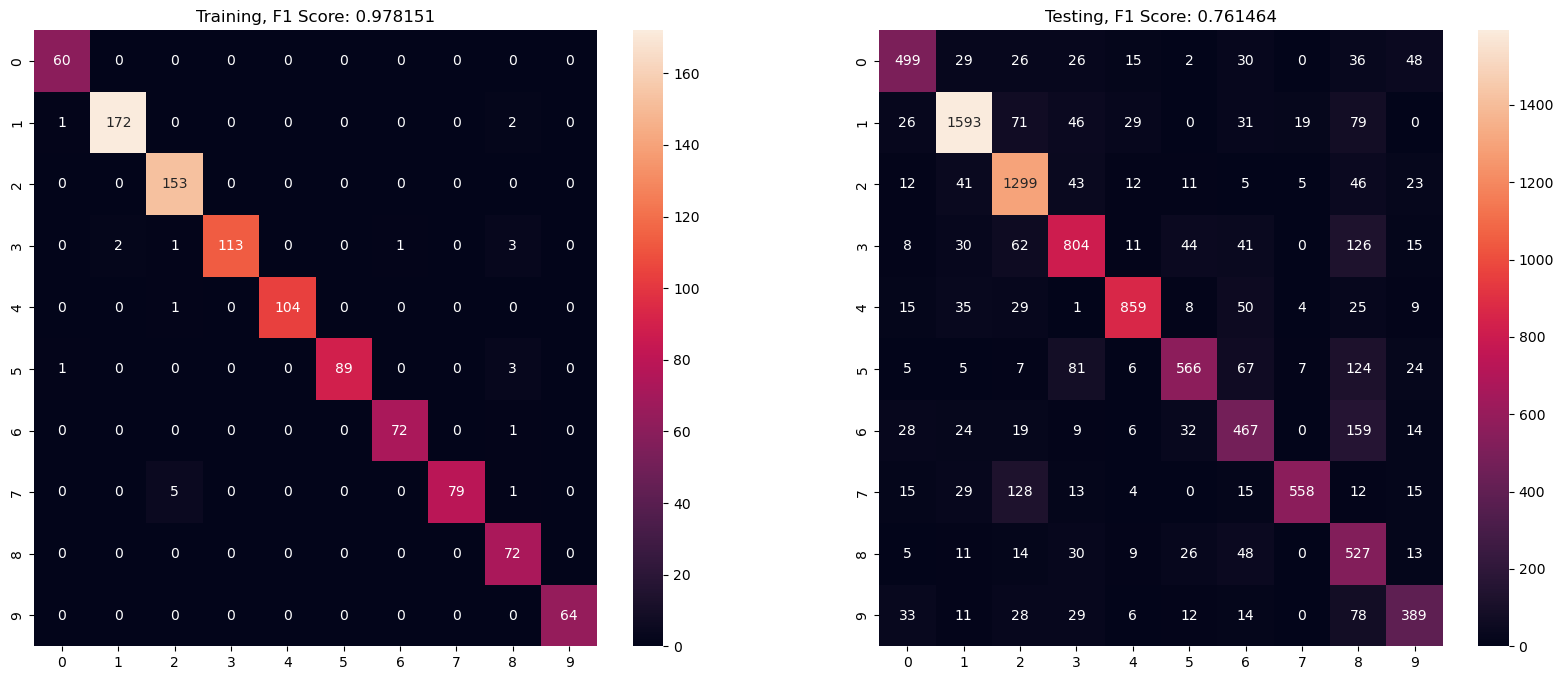

In [12]:
def eval_model(model, train, train_y, test, test_y):
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    # predict on the training set
    pred = model.predict(train, verbose=False);
    # get indexes for the predictions and ground truth, this is converting back from a one-hot representation
    # to a single index
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(train_y, axis=1)

    # plot the confusion matrix, I'm using tensorflow and seaborn here, but you could use
    # sklearn as well
    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    # set the title to the F1 scope
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

    # repeat visualisation for the test set
    ax = fig.add_subplot(1, 2, 2)  
    pred = model.predict(test, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(test_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))
    
eval_model(model_vgg, train_X, train_Y, test_X, test_Y)

### With Augmentation
We will use the following:
* moderate translations
* small rotations
* moderate scale changes
* reflections on the X-axis

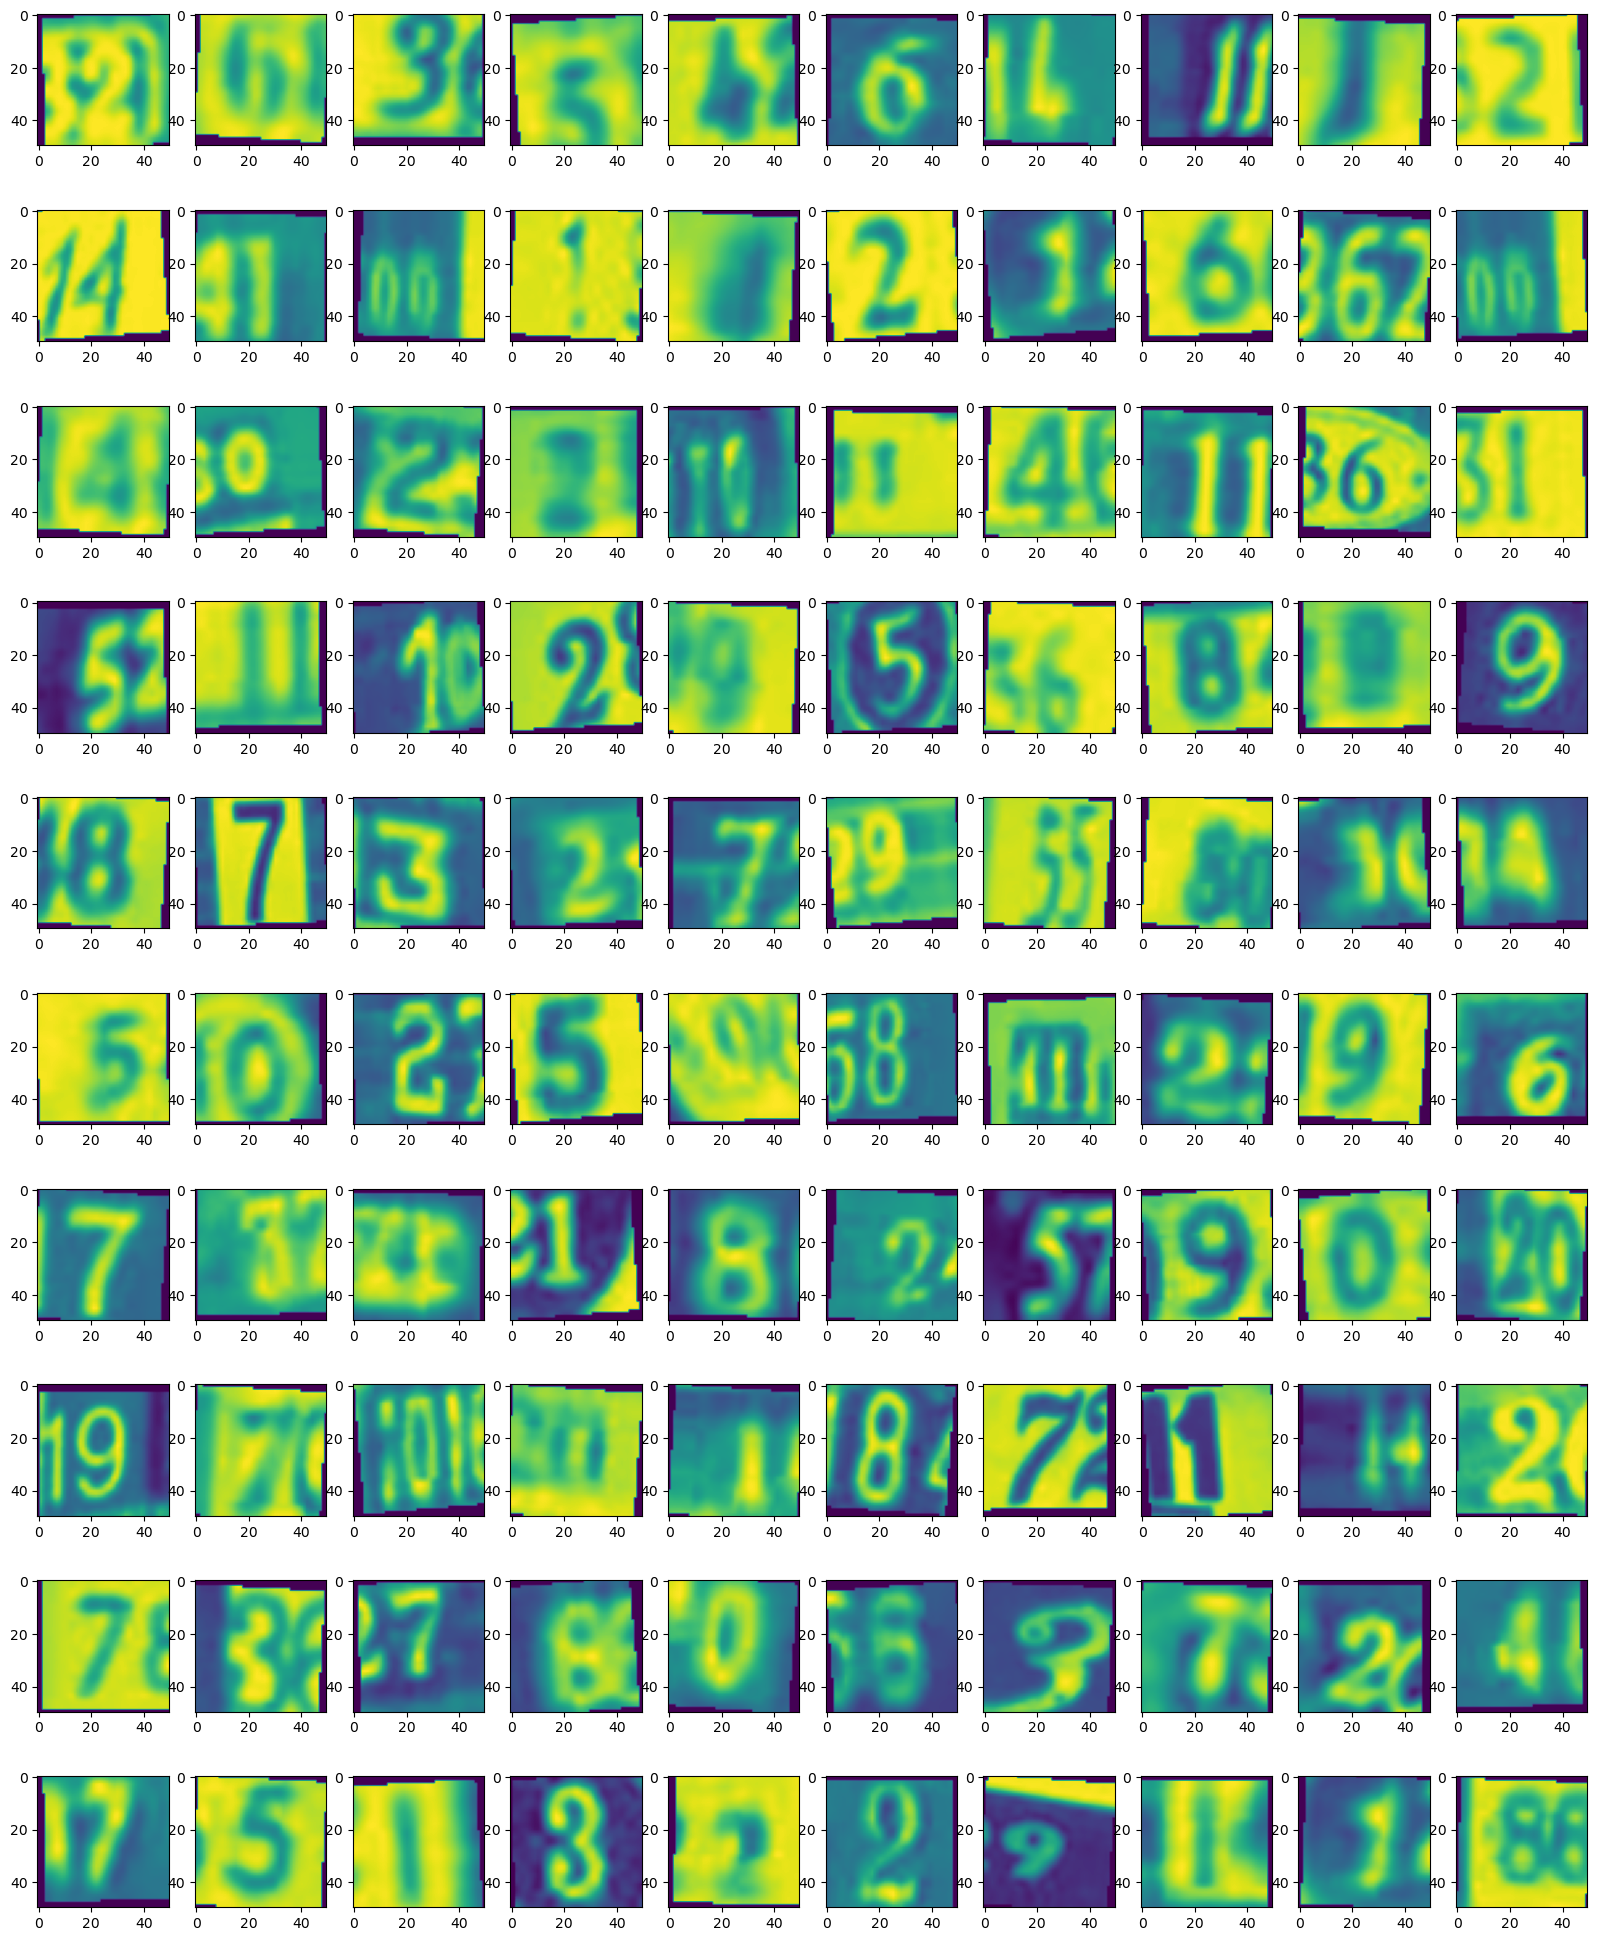

In [13]:
datagen = ImageDataGenerator(
                            # rotate between -5, +5 degrees
                            rotation_range=5,
                            # horiziontal shift by +/- 5% of the image width
                            width_shift_range=0.05,
                            # vertical shift by +/- 5% of the image width
                            height_shift_range=0.05,
                            # what value to place in new pixels, given the nature of our data (clothes on a black backround)
                            # we'll set this to a constant value of 0
                            fill_mode='constant', cval=0)

batch = datagen.flow(train_X_large_gs, train_Y, batch_size=100)
fig = plt.figure(figsize=[20, 25])
for i,img in enumerate(batch[0][0]):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(img[:,:,:])

In [14]:
# develop, evaluate and compare DCNNs
vgg_train_start = process_time()
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(50, 50, 1, ), name='augmented')

# 3x3 conv block, we have two conv layers, and a max-pooling. The conv layers have identical parameters
# and are simply separated by an activation, in our case, relu
x = layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation=None)(inputs)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, increase filters, same structure as above, but now with 16 filters
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, further increase filters to 32, again the structure is the same
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# flatten layer
x = layers.Flatten()(x)

# dense layer, 512 neurons
x = layers.Dense(512, activation='relu')(x)

# the output, 10 neurons for 10 classes, and a softmax activation
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
model_vgg = keras.Model(inputs=inputs, outputs=outputs, name='vgg_for_svhn')
model_vgg.summary()

# Without augmentation
model_vgg.compile(
    # categorical cross entropy loss
    loss='categorical_crossentropy',
    # adam optimiser
    optimizer=keras.optimizers.Adam(),
    # compute the accuracy metric, in addition to the loss 
    metrics=['accuracy'])

# build the model, and print a summary
model_vgg = keras.Model(inputs=inputs, outputs=outputs, name='augmented_vgg_for_svhn')

# With augmentation
model_vgg.compile(
    # categorical cross entropy loss
    loss='categorical_crossentropy',
    # adam optimiser
    optimizer=keras.optimizers.Adam(),
    # compute the accuracy metric, in addition to the loss 
    metrics=['accuracy'])

vgg_train_end = process_time()

Model: "vgg_for_svhn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 augmented (InputLayer)      [(None, 50, 50, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 8)         80        
                                                                 
 activation_6 (Activation)   (None, 50, 50, 8)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 8)         584       
                                                                 
 activation_7 (Activation)   (None, 50, 50, 8)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 8)        0         
 2D)                                                             
                                                      

In [15]:
svhnaugmented_train_start = process_time()
history = model_vgg.fit(datagen.flow(train_X_large_gs, train_Y, batch_size=128),
                    batch_size=128,
                    epochs=64,
                    validation_data=(test_X_large_gs, test_Y), verbose=True)
svhnaugmented_train_end = process_time()

Epoch 1/64
8/8 [==============================] - 5s 492ms/step - loss: 2.2737 - accuracy: 0.1460 - val_loss: 2.2456 - val_accuracy: 0.1894
Epoch 2/64
8/8 [==============================] - 3s 453ms/step - loss: 2.2515 - accuracy: 0.1750 - val_loss: 2.2375 - val_accuracy: 0.1894
Epoch 3/64
8/8 [==============================] - 3s 457ms/step - loss: 2.2418 - accuracy: 0.1750 - val_loss: 2.2330 - val_accuracy: 0.1894
Epoch 4/64
8/8 [==============================] - 3s 450ms/step - loss: 2.2351 - accuracy: 0.1750 - val_loss: 2.2254 - val_accuracy: 0.1904
Epoch 5/64
8/8 [==============================] - 3s 454ms/step - loss: 2.2246 - accuracy: 0.1880 - val_loss: 2.2166 - val_accuracy: 0.2087
Epoch 6/64
8/8 [==============================] - 3s 471ms/step - loss: 2.2045 - accuracy: 0.1940 - val_loss: 2.1974 - val_accuracy: 0.2136
Epoch 7/64
8/8 [==============================] - 3s 450ms/step - loss: 2.1719 - accuracy: 0.2210 - val_loss: 2.1635 - val_accuracy: 0.2283
Epoch 8/64
8/8 [====

In [16]:
vgg_train_time = vgg_train_end - vgg_train_start
svhn_inference_train_time = svhnaugmented_train_end - svhnaugmented_train_start
print('Training Time: %f\nInference Time: %f' % \
      (vgg_train_time, svhn_inference_train_time))

Training Time: 0.109375
Inference Time: 162.937500


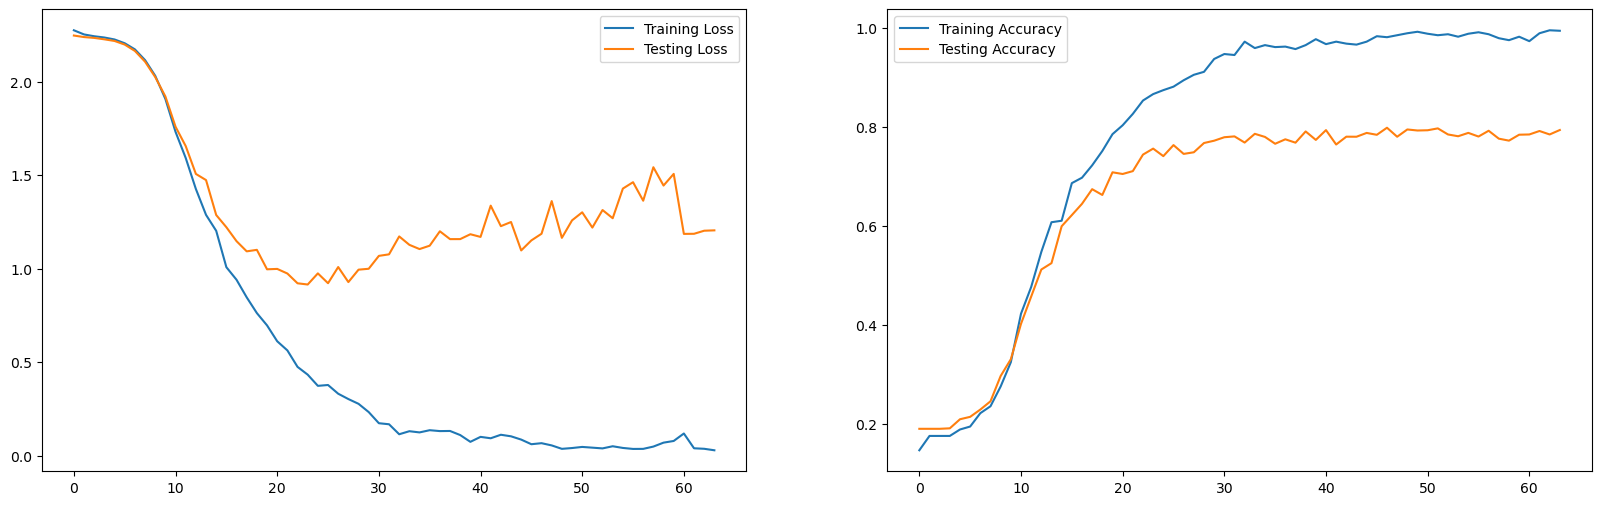

In [17]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label="Training Loss")
ax.plot(history.history['val_loss'], label="Testing Loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label="Training Accuracy")
ax.plot(history.history['val_accuracy'], label="Testing Accuracy")
ax.legend()

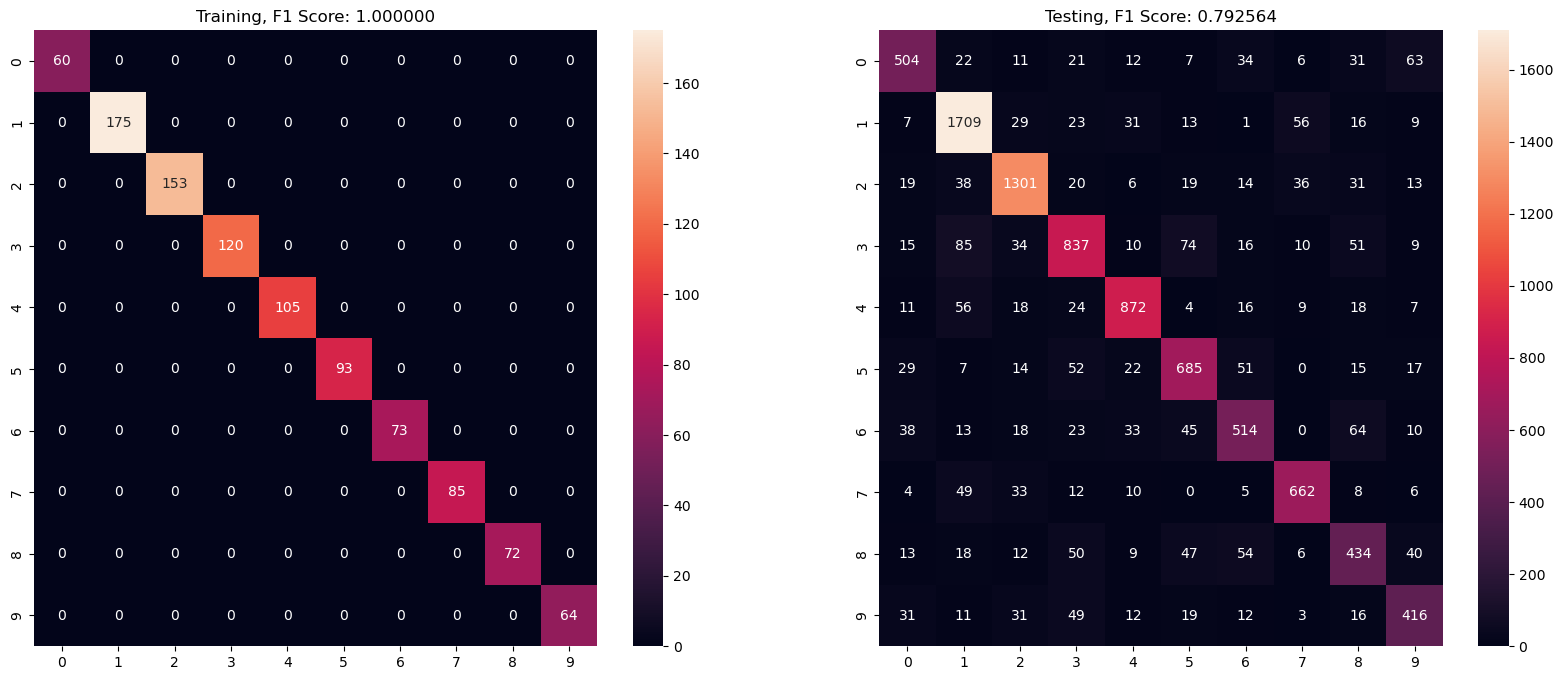

In [18]:
eval_model(model_vgg, train_X_large_gs, train_Y, test_X_large_gs, test_Y)